# Linear & Logistic Regression Analysis on PHQ-9 Dataset

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

sns.set(style="whitegrid")


In [2]:

# Load the PHQ-9 dataset
df = pd.read_csv("phq9_dataset.csv")
df.head()


,Age,Gender,Little interest or pleasure in doing things,"Feeling down, depressed, or hopeless","Trouble falling or staying asleep, or sleeping too much",Feeling tired or having little energy,Poor appetite or overeating,Feeling bad about yourself or that you are a failure,Trouble concentrating on things,Moving or speaking so slowly that other people notice,Thoughts that you would be better off dead or hurting yourself,Unnamed: 11,Sleep Quality,Stress Level
0,23,Male,Several days,More than half the days,Not at all,Not at all,Not at all,Nearly every day,More than half the days,Nearly every day,More than half the days,NaN,Fair,High
1,25,Male,More than half the days,Several days,Several days,Not at all,More than half the days,Not at all,More than half the days,Several days,Not at all,NaN,Excellent,Low
2,21,Male,Several days,Not at all,Several days,Several days,Not at all,More than half the days,Not at all,Nearly every day,Not at all,NaN,Good,Moderate
3,19,Male,Several days,Several days,More than half the days,Not at all,Several days,Not at all,Several days,Several days,Several days,NaN,Poor,Moderate
4,19,Male,Several days,Several days,Several days,Not at all,Not at all,Several days,Not at all,Not at all,Not at all,NaN,Good,Low


In [3]:

# Shape and info
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())


Shape: (530, 14)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 14 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Age                                                             530 non-null    int64  
 1   Gender                                                          530 non-null    object 
 2   Little interest or pleasure in doing things                     530 non-null    object 
 3   Feeling down, depressed, or hopeless                            530 non-null    object 
 4   Trouble falling or staying asleep, or sleeping too much         530 non-null    object 
 5   Feeling tired or having little energy                           530 non-null    object 
 6   Poor appetite or overeating                                     530 non-null    object 
 7   Feeling bad about yourself  o

In [4]:

# Missing values check
df.isnull().sum()


,0
Age,0
Gender,0
Little interest or pleasure in doing things,0
"Feeling down, depressed, or hopeless",0
"Trouble falling or staying asleep, or sleeping too much",0
Feeling tired or having little energy,0
Poor appetite or overeating,0
Feeling bad about yourself or that you are a failure,0
Trouble concentrating on things,0
Moving or speaking so slowly that other people notice,0


In [5]:

# Mapping PHQ-9 responses to numeric scores
response_map = {
    "Not at all": 0,
    "Several days": 1,
    "More than half the days": 2,
    "Nearly every day": 3
}

for col in df.columns:
    if col not in ['Age','Gender','Sleep Quality','Stress Level','model','Unnamed: 11']:
        df[col] = df[col].map(response_map)

# Drop unnamed column if exists
if "Unnamed: 11" in df.columns:
    df.drop("Unnamed: 11", axis=1, inplace=True)

df.head()


,Age,Gender,Little interest or pleasure in doing things,"Feeling down, depressed, or hopeless","Trouble falling or staying asleep, or sleeping too much",Feeling tired or having little energy,Poor appetite or overeating,Feeling bad about yourself or that you are a failure,Trouble concentrating on things,Moving or speaking so slowly that other people notice,Thoughts that you would be better off dead or hurting yourself,Sleep Quality,Stress Level
0,23,Male,1,2,0,0,0,3,2,3,2,Fair,High
1,25,Male,2,1,1,0,2,0,2,1,0,Excellent,Low
2,21,Male,1,0,1,1,0,2,0,3,0,Good,Moderate
3,19,Male,1,1,2,0,1,0,1,1,1,Poor,Moderate
4,19,Male,1,1,1,0,0,1,0,0,0,Good,Low


In [6]:

# Create PHQ-9 total score
phq9_cols = [col for col in df.columns if col not in ['Age','Gender','Sleep Quality','Stress Level']]
df['PHQ9_Total'] = df[phq9_cols].sum(axis=1)

df[['Age','Gender','PHQ9_Total','Sleep Quality','Stress Level']].head()


,Age,Gender,PHQ9_Total,Sleep Quality,Stress Level
0,23,Male,13,Fair,High
1,25,Male,9,Excellent,Low
2,21,Male,8,Good,Moderate
3,19,Male,8,Poor,Moderate
4,19,Male,4,Good,Low


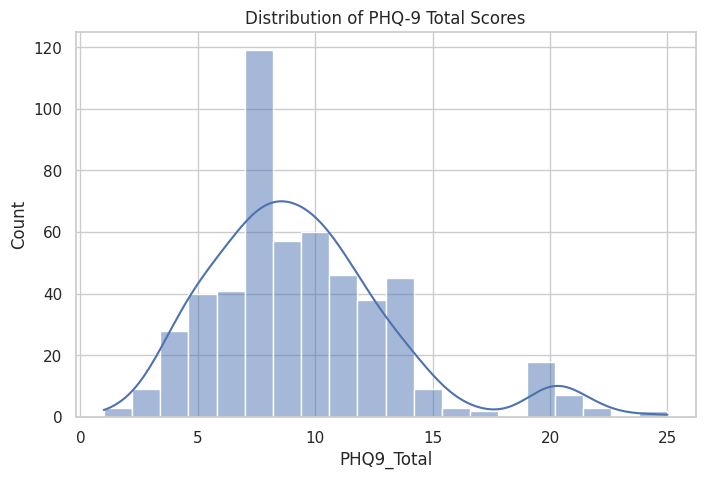

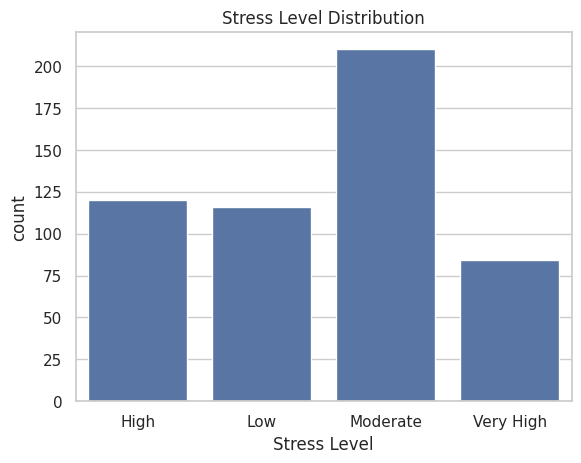

In [7]:

# Distribution of PHQ-9 scores
plt.figure(figsize=(8,5))
sns.histplot(df['PHQ9_Total'], bins=20, kde=True)
plt.title("Distribution of PHQ-9 Total Scores")
plt.show()

# Stress level counts
sns.countplot(x="Stress Level", data=df)
plt.title("Stress Level Distribution")
plt.show()


## Linear Regression: Predicting Age from PHQ-9 Score

Mean Absolute Error: 2.704587662825131
R2 Score: -0.005584002008518496


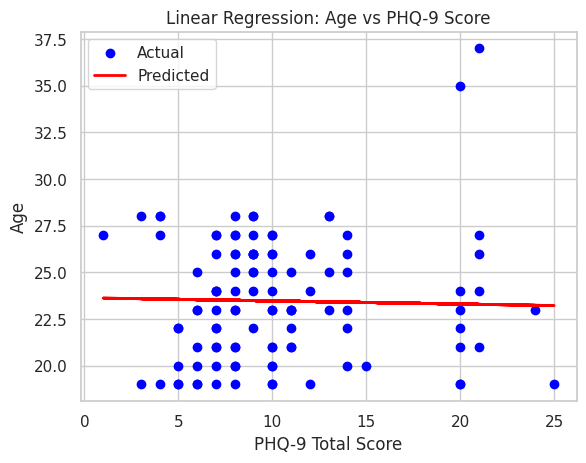

In [8]:

X = df[['PHQ9_Total']]
y = df['Age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# Plot regression
plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Predicted")
plt.xlabel("PHQ-9 Total Score")
plt.ylabel("Age")
plt.title("Linear Regression: Age vs PHQ-9 Score")
plt.legend()
plt.show()


## Logistic Regression: Predicting Stress Level from PHQ-9 Score

Accuracy: 0.4528301886792453

Classification Report:
               precision    recall  f1-score   support

        High       0.33      0.20      0.25        25
         Low       0.42      0.24      0.30        21
    Moderate       0.48      0.86      0.62        44
   Very High       0.00      0.00      0.00        16

    accuracy                           0.45       106
   macro avg       0.31      0.33      0.29       106
weighted avg       0.36      0.45      0.38       106



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


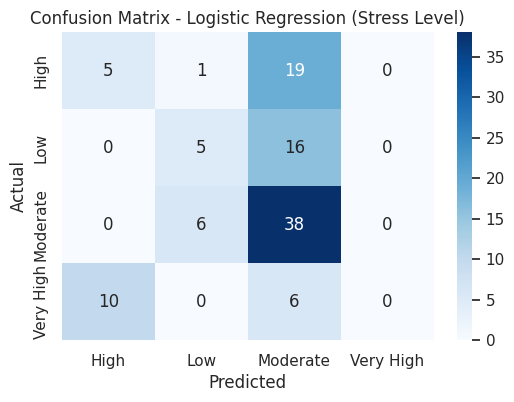

In [9]:

# Encode categorical Stress Level
le = LabelEncoder()
df['Stress_Level_Enc'] = le.fit_transform(df['Stress Level'])

X = df[['PHQ9_Total']]
y = df['Stress_Level_Enc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression (Stress Level)")
plt.show()



### Insights & Observations
- **Linear Regression** showed how PHQ-9 total score can be used to estimate age, though age may not be strongly predictable from PHQ-9.  
- **Logistic Regression** was applied to classify stress level from PHQ-9 total score, with evaluation using accuracy, classification report, and confusion matrix.  
- Further improvements could include using multiple features (gender, sleep quality, individual PHQ-9 items) for better predictive performance.  
